# Math 134C Week 4

In [31]:
import math
import numpy as np
from scipy.stats import norm

def NPV(r, cf, continuous_compounding = False, dt = None): 
    if dt is None: dt = range(len(cf))
    pv = 0
    if not continuous_compounding:
        for k in range(0, len(cf)):
            pv += cf[k] / (1+r)**dt[k]
    else:
        for k in range(0, len(cf)):
            pv += cf[k] * math.exp(-r * dt[k])
    return pv

# r is the risk-free rate, F is a cash flow, and dT is the time that we get each cash flow
def PV(F, dT, r):
    pv = 0
    if len(dT) != len(F):
        print("Input Error")
        return 0
    for n in range(0, len(F)):
        pv += F[n] * math.exp(-r * dT[n])
    return pv
        
# C_t is the price of call option, S_t is the current stock price, K is the strike, r is the risk-free rate, dt is time to expiration. D is the dividend of the stock, and dT is the time at which we receive the dividend. The delta is for the continuous dividend paying model. The function will return the price of the corresponding put option. 
def put_given_call(C_t, S_t, K, r, dt, D= None, dT = None, delta = 0):
    if D is None: D = []
    if dT is None: dT = []
    return C_t - (S_t - PV(D, dT, r)) * math.exp(-delta * dt) + K * math.exp(-r * dt)

def call_given_put(P_t, S_t, K, r, dt, D = None, dT = None, delta = 0):
    if D is None: D = []
    if dT is None: dT = []
    return P_t + (S_t - PV(D, dT, r)) * math.exp(-delta * dt) - K * math.exp(-r * dt)

def one_step_binomial(r, dt, u, d, Vu, Vd, delta = 0):
    q = (math.exp((r - delta) * dt) - d)/(u-d)
    if not (1 > q > 0): 
        print("Arbitrage opportunity exists")
        return -1
    return math.exp(-r * dt)*(q*Vu+(1-q)*Vd)    

def Delta(r, dt, u, d, Vu, Vd, S, delta = 0):
    return math.exp(-delta * dt)*(Vu-Vd)/(S*(u-d))

def B(r, dt, u, d, Vu, Vd):
    return math.exp(-r * dt)*(u * Vd - d * Vu)/(u-d)

def black_scholes_call(S_t, K, dt, r, sigma, delta):
    d1 = (np.log(S_t / K) + (r -delta + 0.5 * sigma ** 2) * dt) / (sigma * np.sqrt(dt))
    d2 = d1 - sigma * np.sqrt(dt)
    call_price = S_t * np.exp(-delta * dt) * norm.cdf(d1) - K * np.exp(-r * dt) * norm.cdf(d2)
    return call_price

def black_scholes_put(S_t, K, dt, r, sigma, delta):
    d1 = (np.log(S_t / K) + (r -delta + 0.5 * sigma ** 2) * dt) / (sigma * np.sqrt(dt))
    d2 = d1 - sigma * np.sqrt(dt)
    call_price = - S_t * np.exp(-delta * dt) * norm.cdf(-d1) + K * np.exp(-r * dt) * norm.cdf(-d2)
    return call_price


**Quiz 3.1**: 
A newborn baby receives 2,000 on her birthday from her parents which is deposited into an account and invested in the Vanguard S\&P 500 Index Fund. That is 2,000 deposited at t=0.

Assume that on every subsequent birthday up to and including her 16th birthday, the baby's parents deposit an additional 1,000 into the same account and invest the money in the Vanguard S\&P 500 Index Fund.  That is 1,000 deposited on each of t=1 through t=16.  There are no more contributions.

Assume the investments in the Vanguard S\&P 500 Index Fund grow at 6% every year after all taxes and expenses. What will be the balance in the account at the baby's 65th birthday, rounded to whole dollars?

In [5]:
cashflow = [2000] + [1000] * 16
print(f"The balance in the baby's 65th birthday is {NPV(0.06, cashflow) * (1.06) ** 65:.0f}")

The balance in the baby's 65th birthday is 534414


**Quiz 3.2:**
Suppose that the risk-less interest rate is zero.  Suppose that a stock is priced at 100, and one year from now will be at either 130 or 70, with probabilities 0.80 and 0.20, respectively. There are no dividends. 

What is the value of a one-year European call with strike price 110?

In [7]:
u = 130/100
d = 70/100
q = (1-d)/(u-d)
print(f"The price of the call option is {q * 20 + (1-q) * 0:.2f}")

The price of the call option is 10.00


**Quiz 3.3:**
Suppose that the riskless interest rate is zero.  Suppose that a stock is priced at 100, and one year from now will be at either 130 or 70, with probabilities 0.80 and 0.20, respectively. There are no dividends.  Consider a one-year European call option with strike price 110.

What portfolio of the stock and a riskless bond exactly replicates this call option?

In [12]:
print(f"We need to buy {Delta(r = 0, dt = 1, u = 1.3, d = 0.7, Vu = 20, Vd = 0, S = 100):.2f} shares of the stock")
print(f"We also need to short {-B(r = 0, dt = 1, u = 1.3, d =0.7, Vu = 20, Vd = 0):.2f} in the bank")

We need to buy 0.33 shares of the stock
We also need to short 23.33 in the bank


**Quiz 3.4:**
Suppose that the riskless interest rate is zero.  Suppose that a stock is priced at 100, and one year from now will be at either 130 or 70, with probabilities 0.80 and 0.20, respectively. There are no dividends. 

What is $\alpha$, the continuously compounded expected return on the stock?

In [13]:
print(f"The alpha is {math.log(118/100, math.e)*100:.2f}%")

The alpha is 16.55%


**Quiz 3.5:**
Consider a two-period binomial model, where each period is 6 months. Assume the stock price is 46.00, $\sigma$ = 0.28, the annual continuously compounded risk free rate r = 6\% and the annual continuously compounded dividend yield $\delta$ is 2%. 

Assume the binomial tree is constructed using:
$$u = e^{(r-\delta)h+\sigma\sqrt{h}}$$
$$d = e^{(r-\delta)h-\sigma\sqrt{h}}$$


At what strike price would early exercise occur with an American call option?

In [21]:
u = math.exp((0.06-0.02)*0.5 + 0.28 * 0.5 ** 0.5)
d = math.exp((0.06-0.02)*0.5 - 0.28 * 0.5 ** 0.5)
K = 19
Cu = one_step_binomial(r = 0.06, dt = 0.5, u = u, d = d, Vu = max(46 * u * u - K, 0), Vd = max(46 * u * d -K, 0), delta = 0.02)
print(f"If we choose not to exercise early when the stock goes up once, the value of the option is {Cu:.3f}")
print(f"If we choose to exercise early when the stock goes up once, the payoff is {max(46 * u - K, 0):.3f}")
Cd = one_step_binomial(r = 0.06, dt = 0.5, u = u, d = d, Vu = max(46 * d * u - K, 0), Vd = max(46 * d * d -K, 0), delta = 0.02)
print(f"If we choose not to exercise early when the stock goes down once, the value of the option is {Cd:.3f}")
print(f"If we choose to exercise early when the stock goes up once, the payoff is {max(46 * d - K, 0):.3f}")
C = one_step_binomial(r = 0.06, dt = 0.5, u = u, d = d, Vu = max(Cu, max(46 * u - K, 0)), Vd = Cd, delta = 0.02)
print(f"If we choose not to exercise early, then the payoff is {C:.3f}")

If we choose not to exercise early when the stock goes up once, the value of the option is 38.197
If we choose to exercise early when the stock goes up once, the payoff is 38.204
If we choose not to exercise early when the stock goes down once, the value of the option is 19.678
If we choose to exercise early when the stock goes up once, the payoff is 19.500
If we choose not to exercise early, then the payoff is 27.199


**Quiz 3.6:**
Consider a one-period binomial model of 6 months. Assume the stock price is 63.00, $\sigma$ = 0.28, the annual continuously compounded risk free rate r = 5% and the stock's expected annual continuously compounded return is 14.0%. There are no dividends.

Assume the binomial tree is constructed using:

$$u = e^{(r-\delta)h+\sigma\sqrt{h}}$$
$$d = e^{(r-\delta)h-\sigma\sqrt{h}}$$

What is the true probability of the stock going up?

In [24]:
u = math.exp(0.05 * 0.5 + 0.28 * 0.5 ** 0.5)
d = math.exp(0.05 * 0.5 - 0.28 * 0.5 ** 0.5)
print(f"The probability that the stock will go up is {(math.exp(0.07) - d)/(u-d):.3f}")

The probability that the stock will go up is 0.566


**Quiz 3.8:**
True or False:  Option pricing does not depend on the expected return of the underlying stock.

**Solution:** True

**Quiz 3.10:**
The stock price S = 100 and the annual continuously compounded risk-free rate is 5%. There are no dividends.

Consider a 1-year European call option strike at- the-money (strike price = current stock price)

If the volatility $\sigma$ is zero, what is the option worth?

In [3]:
print(f"The option worth {(100 * math.exp(0.05) - 100) * math.exp(-0.05):.2f}")

The option worth 4.88


# Black-Scholes Framework of Stock price
We model the stock price by using the following **ito's process**
$$\frac{dS_t}{S_t} = \mu dt + \sigma dB_t$$
where $B_t$ is the standard **Brownian motion/Wiener process**, and $dB_t \sim N(0, dt)$. We call the $\mu$ as the **drift** and $\sigma$ as the **volatility**. 

# Ito's Lemma
Let $f(x, t)$ be a twice differentiable function, and $dX_t = \mu_t dt + \sigma_tdB_t$ be an ito's process. Then we have 
$$df(X,t) = \left(\frac{\partial f}{\partial t} + \mu_t\frac{\partial f}{\partial x}+\frac{\sigma_t^2}{2}\frac{\partial^2 f}{\partial x^2}\right)dt+\sigma_t\frac{\partial f}{\partial x}dB_t$$

# Solving stock price formula by Ito's Lemma
Take $f(x, t) = \ln X$, and $dS_t = \mu S_t dt + \sigma S_t dB_t$, then we have 
$$d\ln(S_t) = (\frac{1}{S_t}\cdot \mu_tS_t - \frac{1}{S_t^2}\frac{\sigma^2S_t}{2})dt + \sigma S_t \frac{1}{S_t}dB_t = (\mu-\frac{\sigma^2}{2})dt + \sigma dB_t$$

By integrating both sides, we have 
$$S_t = S_0\text{exp}((\mu-\sigma^2/2)t+\sigma B_t)$$
where $B_t$ is the Brownian motion respect to the real probability. In the risk-neutral world, the discounted stock price is a Martingale. If the stock does not pay divident, then we can solve that 
$$S_t = S_0(\text{exp}(r-\sigma^2/2)t + \sigma \tilde{B_t})$$

# Black-Scholes Formula
Assume that the risk-free rate is $r$. Then the call option with strike $K$, mature in time T, on a stock with price $S$, volatility $\sigma$, continuous dividend yield $\delta$ has price 
$$C = Se^{-\delta T}N(d_1)-Ke^{-rT}N(d_2)$$
$$d_1 = \frac{\ln(S/K)+(r-\delta+\frac{1}{2}\sigma^2)T}{\sigma\sqrt{T}}$$
$$d_2 = d_1-\sigma\sqrt{T}$$

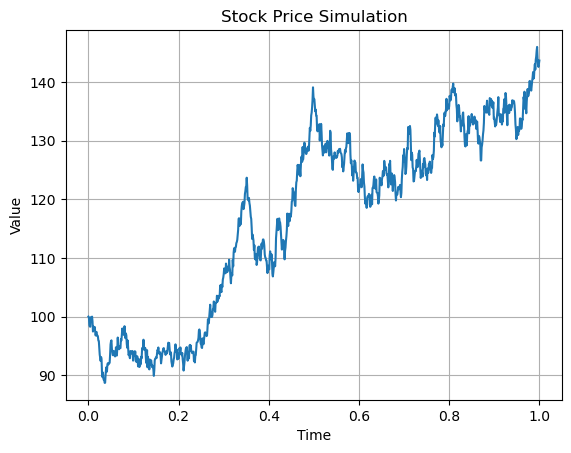

In [31]:
import numpy as np
import matplotlib.pyplot as plt

def stock_price(T, N, mu, sigma, S0):
    dt = float(T) / N
    t = np.linspace(0, T, N+1)
    W = np.zeros(N+1)
    W[0] = S0
    for i in range(1, N+1):
        Z = np.random.normal(0, 1)
        W[i] = W[i-1] + W[i-1] * mu * dt + W[i-1]* sigma * np.sqrt(dt) * Z
    return t, W

# Parameters
T = 1.0     # Time horizon
N = 1000    # Number of time steps
mu = 0.1    # Drift
sigma = 0.3 # Volatility
S0 = 100    # Initial value

t, W = stock_price(T, N, mu, sigma, S0)

# Plot Brownian motion
plt.plot(t, W)
plt.xlabel('Time')
plt.ylabel('Value')
plt.title('Stock Price Simulation')
plt.grid(True)
plt.show()

**Exercise 12.3:** Let S = $100, K = $120, $\sigma$ = 30%, r = 0.08, and $\delta$ = 0. 

a. Compute the Black-Scholes call price for 1 year to maturity and for a variety of very long times to maturity. What happens to the option price as $T\rightarrow\infty$? \
b. Set $\delta$ = 0.001. Repeat (a). Now what happens to the option price? What accounts for the difference?

In [62]:
print(f"a) The 1 year call option has price {black_scholes_call(100, 120, 1, 0.08, 0.3, 0):.3f}")
print("   If T goes to infinity, then the price of the call option will converge to the stock price 100. We print a short list of call option price with longer time to maturity")
for T in [10, 100, 1000, 10000, 100000]:
    print(f"   The call option with T = {T} has price {black_scholes_call(100,120, T, 0.08, 0.3, 0):.3f}")
print(f"b) If the continuous dividend yield is 0.001, then the call option price will converge to 0. We print a shor list of call options with longer time to maturity")
for T in [10, 100, 1000, 10000, 100000]:
    print(f"   The call option with T = {T} has price {black_scholes_call(100,120, T, 0.08, 0.3, 0.001):.3f}")
print(f"The difference is that the if the stock pays dividend, then the holder of the call option can never get the dividend, and the longer we hold the contract, the more dividend we will lose, and the value of a very long call option on a dividend paying stock should be zero.")

a) The 1 year call option has price 7.897
   If T goes to infinity, then the price of the call option will converge to the stock price 100. We print a short list of call option price with longer time to maturity
   The call option with T = 10 has price 56.238
   The call option with T = 100 has price 99.963
   The call option with T = 1000 has price 100.000
   The call option with T = 10000 has price 100.000
   The call option with T = 100000 has price 100.000
b) If the continuous dividend yield is 0.001, then the call option price will converge to 0. We print a shor list of call options with longer time to maturity
   The call option with T = 10 has price 55.373
   The call option with T = 100 has price 90.447
   The call option with T = 1000 has price 36.788
   The call option with T = 10000 has price 0.005
   The call option with T = 100000 has price 0.000
The difference is that the if the stock pays dividend, then the holder of the call option can never get the dividend, and the lo

**Exercise 12.4:** Let S = 120, K = 100, $\sigma$ = 30%, r = 0, and $\delta$ = 0.08.

a. Compute the Black-Scholes call price for 1 year to maturity and for a variety of very long times to maturity. What happens to the price as $T\rightarrow\infty$?
b. Set r = 0.001. Repeat (a). Now what happens? What accounts for the difference?

In [35]:
print(f"a) The 1 year call option has price {black_scholes_call(120, 100, 1, 0, 0.3, 0.08):.3f}")
print("   If T goes to infinity, then the price of the call option will converge to 0. We print a short list of call option price with longer time to maturity")
for T in [10, 100, 1000, 10000, 100000]:
    print(f"   The call option with T = {T} has price {black_scholes_call(120,100, T, 0, 0.3, 0.08):.3f}")
print(f"b) If the continuous interest rate is 0.001, then the call option price will converge to 0. We print a shor list of call options with longer time to maturity")
for T in [10, 100, 1000, 10000, 100000]:
    print(f"   The call option with T = {T} has price {black_scholes_call(120,100, T, 0.001, 0.3, 0.08):.3f}")

a) The 1 year call option has price 18.671
   If T goes to infinity, then the price of the call option will converge to 0. We print a short list of call option price with longer time to maturity
   The call option with T = 10 has price 10.157
   The call option with T = 100 has price 0.003
   The call option with T = 1000 has price 0.000
   The call option with T = 10000 has price 0.000
   The call option with T = 100000 has price 0.000
b) If the continuous interest rate is 0.001, then the call option price will converge to 0. We print a shor list of call options with longer time to maturity
   The call option with T = 10 has price 10.288
   The call option with T = 100 has price 0.004
   The call option with T = 1000 has price 0.000
   The call option with T = 10000 has price 0.000
   The call option with T = 100000 has price 0.000


**Exercise 12.7**Suppose S = 100, K = 95, $\sigma$ = 30\%, r = 0.08, $\delta$ = 0.03, and T = 0.75. \
a. Compute the Black-Scholes price of a call.
b. Compute the Black-Scholes price of a call for which $S = 100 \cdot e^{−0.03\cdot 0.75}$, $K = 95  e^{−0.08\cdot 0.75}$, $\sigma$ = 0.3, T = 0.75, $\delta$ = 0, r = 0. How does your answer compare to that for (a)?

In [15]:
print(f"a) The price of this call option is {black_scholes_call(100, 95, 0.75, 0.08, 0.3, 0.03):.3f}")
print(f"b) The price of this call option is {black_scholes_call(100 * math.exp(-0.03 * 0.75), 95* math.exp(-0.08 * 0.75), 0.75, 0, 0.3, 0):.3f}.", "They are the same")

a) The price of this call option is 14.386
b) The price of this call option is 14.386. They are the same


**Exercise 12.13:**
Consider a bull spread where you buy a 40-strike call and sell a 45-strike call. Suppose S = 40, $\sigma$ = 0.30, r = 0.08, $\delta$ = 0, and T = 0.5. Draw a graph with stock
prices ranging from 20 to 60 depicting the profit on the bull spread after 1 day, 3 months, and 6 months.

C:\Users\tianhao\AppData\Local\Temp\ipykernel_32592\148146544.py:51: RuntimeWarning: divide by zero encountered in true_divide
  d1 = (np.log(S_t / K) + (r -delta + 0.5 * sigma ** 2) * dt) / (sigma * np.sqrt(dt))


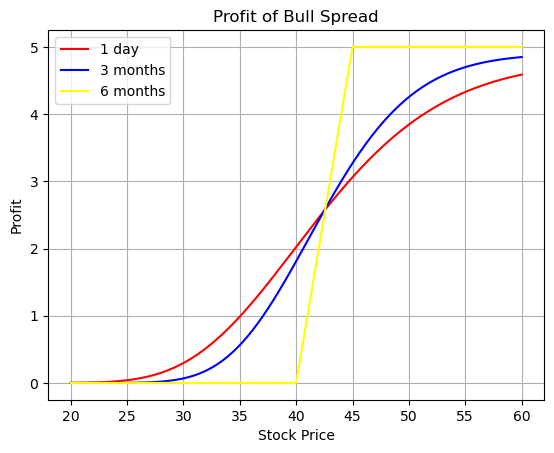

In [28]:
import numpy as np
import matplotlib.pyplot as plt

def payoff(S, t):
    return black_scholes_call(S, 40, 0.5-t, 0.08, 0.3, 0) - black_scholes_call(S, 45, 0.5-t, 0.08, 0.3, 0)


S = np.linspace(20, 60, 1000)

P_1 = payoff(S, 1/356)
P_2 = payoff(S, 0.25)
P_3 = payoff(S, 0.5)
# Plot Brownian motion
plt.plot(S, P_1, label = "1 day", color = "red")
plt.plot(S, P_2, label = "3 months", color = "blue")
plt.plot(S, P_3, label = "6 months", color = "yellow")

plt.xlabel('Stock Price')
plt.ylabel('Profit')
plt.title('Profit of Bull Spread')
plt.grid(True)
plt.legend()
plt.show()

For those who have knowledge in PDE, you can see from the above diagram that the BS formula is the solution to some inverse heat equation. 

**Exercise 12.20:** Let S = 100, K = 90, $\sigma$ = 30%, r = 8%, $\delta$ = 5%, and T = 1. \
a. What is the Black-Scholes call price? \
b. Now price a put where S = 90, K = 100, $\sigma$ = 30%, r = 5%, $\delta$ = 8%, and T = 1. \
c. What is the link between your answers to (a) and (b)? Why?

In [34]:
print(f"a) The price of this call option is {black_scholes_call(100, 90, 1, 0.08, 0.3, 0.05):.3f}")
print(f"b) The price of this put option is {black_scholes_put(90, 100, 1, 0.05, 0.3, 0.08):.3f}")
print("c) They are the same. ")

a) The price of this call option is 17.699
b) The price of this put option is 17.699
c) They are the same. 
